Лабораторна робота №3 на тему: "Unsupervised Learning" Молодід Єгор ДА-02

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"C:\Users\starodubbb\Desktop\lab3\train.csv")

Аналіз даних

Перевірка даних

In [3]:
print(train.shape)

(891, 12)


In [4]:
math.log(891)

6.792344427470809

In [5]:
train.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.45,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.55,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.00,B94,S
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,E8,S
383,384,1,1,"Holverson, Mrs. Alexander Oskar (Mary Aline To...",female,35.0,1,0,113789,52.00,NaN,S
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.75,NaN,Q
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.75,NaN,Q
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.20,B82 B84,C


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Визначення типів атрибутів

In [7]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Визначення категоріальних атрибутів

In [8]:
cat_features = ["Name", "Sex", "Embarked", "Ticket", "Cabin"]
for f in cat_features:
    train[f] = train[f].astype("category")

In [9]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [10]:
train[cat_features].describe()

,Name,Sex,Embarked,Ticket,Cabin
count,891,891,889,891,204
unique,891,2,3,681,147
top,"Abbing, Mr. Anthony",male,S,1601,C23 C25 C27
freq,1,577,644,7,4


In [11]:
train[train.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Визначення пропущених даних

In [12]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Outliers

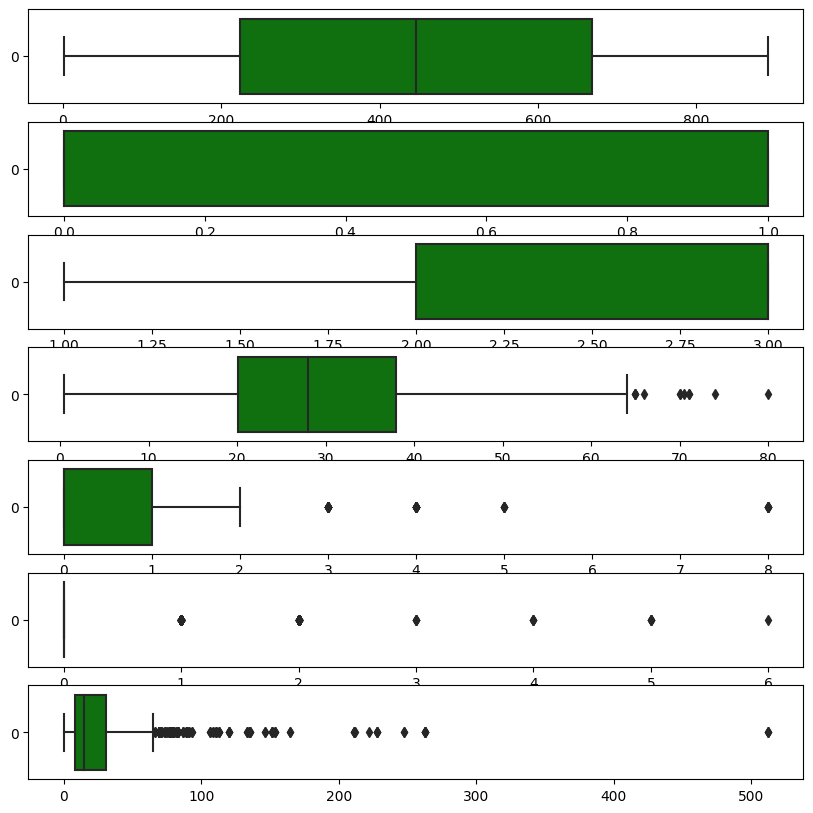

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [13]:
num_features = train.select_dtypes(include = ['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=len(num_features), ncols=1)
fig.set_size_inches(10, 10)
for i, col in enumerate(num_features):
    sns.boxplot(data=train[col], orient='h', ax=axes[i], color='g')
plt.show()
print(num_features)

Підготовка даних

In [14]:
col_delete_candidate = { 'Name', 'Ticket', 'Cabin' }

Обробка пропущених значень

In [15]:
# видалення рядків з пропущеними значеннями у колонці "Embarked"
row_delete_candidate = { 'Embarked' }
train = train.dropna(subset=row_delete_candidate)

In [16]:
#заповнення NaN значень в колонці "Age" медіаною
train["Age"].fillna(train["Age"].median(), inplace=True)

In [17]:
for d in col_delete_candidate:
    train.drop(d, inplace=True, axis=1)

In [18]:
print(train.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


Dimensionality reduction

In [19]:
from sklearn.decomposition import PCA

In [21]:
reduction_candidate = ['SibSp', 'Parch']

pca = PCA(n_components=1)
X = train[reduction_candidate]
pca.fit(X)
X_pca = pca.transform(X)

for d in reduction_candidate:
    train.drop(d, inplace=True, axis=1)

train['Kin'] = X_pca

In [24]:
train.Kin.sample(10)

839   -0.639242
358   -0.639242
696   -0.639242
20    -0.639242
233    3.832818
9      0.257788
525   -0.639242
127   -0.639242
308    0.257788
139   -0.639242
Name: Kin, dtype: float64

In [25]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
0,1,0,3,male,22.0,7.2500,S,0.257788
1,2,1,1,female,38.0,71.2833,C,0.257788
2,3,1,3,female,26.0,7.9250,S,-0.639242
3,4,1,1,female,35.0,53.1000,S,0.257788
4,5,0,3,male,35.0,8.0500,S,-0.639242


Label encoding для колонок "Sex" та "Embarked"

In [26]:
train['Embarked'] = train['Embarked'].cat.codes
train['Sex'] = train['Sex'].cat.codes

In [27]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
0,1,0,3,1,22.0,7.2500,2,0.257788
1,2,1,1,0,38.0,71.2833,0,0.257788
2,3,1,3,0,26.0,7.9250,2,-0.639242
3,4,1,1,0,35.0,53.1000,2,0.257788
4,5,0,3,1,35.0,8.0500,2,-0.639242


Видалення колонки "PassengerId"

In [28]:
pass_id = train.PassengerId
train.drop('PassengerId', inplace=True, axis=1)

In [29]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
0,0,3,1,22.0,7.2500,2,0.257788
1,1,1,0,38.0,71.2833,0,0.257788
2,1,3,0,26.0,7.9250,2,-0.639242
3,1,1,0,35.0,53.1000,2,0.257788
4,0,3,1,35.0,8.0500,2,-0.639242
5,0,3,1,28.0,8.4583,1,-0.639242
6,0,1,1,54.0,51.8625,2,-0.639242
7,0,3,1,2.0,21.0750,2,2.493818
8,1,3,0,27.0,11.1333,2,0.244700
9,1,2,0,14.0,30.0708,0,0.257788


Кластеризація

In [30]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import DBSCAN

Kmeans

4 clusters

In [35]:
kmeans = KMeans(n_clusters=4).fit(train)
kmeans_labels = kmeans.labels_

first_cluster = np.where(kmeans_labels == 0)
second_cluster = np.where(kmeans_labels == 1)
third_cluster = np.where(kmeans_labels == 2)
fourth_cluster = np.where(kmeans_labels == 3)

First cluster

In [36]:
print(train.iloc[first_cluster])

     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
0           0       3    1  22.0   7.2500         2  0.257788
2           1       3    0  26.0   7.9250         2 -0.639242
4           0       3    1  35.0   8.0500         2 -0.639242
5           0       3    1  28.0   8.4583         1 -0.639242
7           0       3    1   2.0  21.0750         2  2.493818
..        ...     ...  ...   ...      ...       ...       ...
886         0       2    1  27.0  13.0000         2 -0.639242
887         1       1    0  19.0  30.0000         2 -0.639242
888         0       3    0  28.0  23.4500         2  1.141729
889         1       1    1  26.0  30.0000         0 -0.639242
890         0       3    1  32.0   7.7500         1 -0.639242

[725 rows x 7 columns]


In [37]:
train.iloc[first_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000,725.000000
mean,0.318621,2.557241,0.691034,28.273448,15.273005,1.609655,-0.105073
std,0.466263,0.667802,0.462386,12.685770,9.749518,0.724981,1.020038
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,-0.639242
25%,0.000000,2.000000,0.000000,22.000000,7.879200,2.000000,-0.639242
50%,0.000000,3.000000,1.000000,28.000000,10.500000,2.000000,-0.639242
75%,1.000000,3.000000,1.000000,33.000000,23.250000,2.000000,0.257788
max,1.000000,3.000000,1.000000,80.000000,46.900000,2.000000,4.729847


Second cluster

In [39]:
print(train.iloc[second_cluster])

     Survived  Pclass  Sex    Age      Fare  Embarked       Kin
27          0       1    1  19.00  263.0000         2  2.935788
31          1       1    0  28.00  146.5208         0  0.257788
88          1       1    0  23.00  263.0000         2  2.935788
118         0       1    1  24.00  247.5208         0 -0.197271
195         1       1    0  58.00  146.5208         0 -0.639242
268         1       1    0  58.00  153.4625         2 -0.197271
297         0       1    0   2.00  151.5500         2  1.141729
299         1       1    0  50.00  247.5208         0 -0.197271
305         1       1    1   0.92  151.5500         2  1.141729
311         1       1    0  18.00  262.3750         0  2.038759
318         1       1    0  31.00  164.8667         2  0.244700
332         0       1    1  38.00  153.4625         2 -0.197271
341         1       1    0  24.00  263.0000         2  2.935788
377         0       1    1  27.00  211.5000         0  0.244700
380         1       1    0  42.00  227.5

In [40]:
train.iloc[second_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,28.000000,28.0,28.000000,28.000000,28.000000,28.000000,28.000000
mean,0.678571,1.0,0.285714,30.675714,204.948064,1.214286,0.490818
std,0.475595,0.0,0.460044,15.461855,45.373543,0.994695,1.212332
min,0.000000,1.0,0.000000,0.920000,146.520800,0.000000,-0.639242
25%,0.000000,1.0,0.000000,21.750000,153.462500,0.000000,-0.639242
50%,1.000000,1.0,0.000000,28.000000,211.418750,2.000000,0.023714
75%,1.000000,1.0,1.000000,40.500000,247.520800,2.000000,1.141729
max,1.000000,1.0,1.000000,64.000000,263.000000,2.000000,2.935788


Third cluster

In [41]:
print(train.iloc[third_cluster])

     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
1           1       1    0  38.0  71.2833         0  0.257788
3           1       1    0  35.0  53.1000         2  0.257788
6           0       1    1  54.0  51.8625         2 -0.639242
34          0       1    1  28.0  82.1708         0  0.257788
35          0       1    1  42.0  52.0000         2  0.257788
..        ...     ...  ...   ...      ...       ...       ...
849         1       1    0  28.0  89.1042         0  0.257788
863         0       3    0  28.0  69.5500         2  7.420936
867         0       1    1  31.0  50.4958         2 -0.639242
871         1       1    0  47.0  52.5542         2  0.699759
879         1       1    0  56.0  83.1583         0 -0.197271

[133 rows x 7 columns]


In [42]:
train.iloc[third_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,0.654135,1.278195,0.496241,34.571429,76.582612,1.233083,0.480533
std,0.477448,0.655436,0.501876,12.949369,23.349158,0.968341,1.749290
min,0.000000,1.000000,0.000000,4.000000,46.900000,0.000000,-0.639242
25%,0.000000,1.000000,0.000000,26.000000,56.495800,0.000000,-0.639242
50%,1.000000,1.000000,0.000000,31.000000,73.500000,2.000000,0.257788
75%,1.000000,1.000000,1.000000,44.000000,86.500000,2.000000,0.257788
max,1.000000,3.000000,1.000000,71.000000,135.633300,2.000000,7.420936


Fourth cluster

In [44]:
print(train.iloc[fourth_cluster])

     Survived  Pclass  Sex   Age      Fare  Embarked       Kin
258         1       1    0  35.0  512.3292         0 -0.639242
679         1       1    1  36.0  512.3292         0 -0.197271
737         1       1    1  35.0  512.3292         0 -0.639242


In [45]:
train.iloc[fourth_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,3.0,3.0,3.000000,3.000000,3.0000,3.0,3.000000
mean,1.0,1.0,0.666667,35.333333,512.3292,0.0,-0.491918
std,0.0,0.0,0.577350,0.577350,0.0000,0.0,0.255172
min,1.0,1.0,0.000000,35.000000,512.3292,0.0,-0.639242
25%,1.0,1.0,0.500000,35.000000,512.3292,0.0,-0.639242
50%,1.0,1.0,1.000000,35.000000,512.3292,0.0,-0.639242
75%,1.0,1.0,1.000000,35.500000,512.3292,0.0,-0.418256
max,1.0,1.0,1.000000,36.000000,512.3292,0.0,-0.197271


2 clusters

In [46]:
kmeans = KMeans(n_clusters=2).fit(train)
kmeans_labels = kmeans.labels_

first_cluster = np.where(kmeans_labels == 0)
second_cluster = np.where(kmeans_labels == 1)

First cluster

In [47]:
print(train.iloc[first_cluster])

     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
0           0       3    1  22.0   7.2500         2  0.257788
1           1       1    0  38.0  71.2833         0  0.257788
2           1       3    0  26.0   7.9250         2 -0.639242
3           1       1    0  35.0  53.1000         2  0.257788
4           0       3    1  35.0   8.0500         2 -0.639242
..        ...     ...  ...   ...      ...       ...       ...
886         0       2    1  27.0  13.0000         2 -0.639242
887         1       1    0  19.0  30.0000         2 -0.639242
888         0       3    0  28.0  23.4500         2  1.141729
889         1       1    1  26.0  30.0000         0 -0.639242
890         0       3    1  32.0   7.7500         1 -0.639242

[836 rows x 7 columns]


In [48]:
train.iloc[first_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.360048,2.394737,0.667464,29.171352,22.274172,1.575359,-0.021877
std,0.480301,0.790465,0.471404,12.921346,20.660337,0.759966,1.191062
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,-0.639242
25%,0.000000,2.000000,0.000000,22.000000,7.895800,1.000000,-0.639242
50%,0.000000,3.000000,1.000000,28.000000,13.000000,2.000000,-0.639242
75%,1.000000,3.000000,1.000000,34.625000,27.720800,2.000000,0.257788
max,1.000000,3.000000,1.000000,80.000000,93.500000,2.000000,7.420936


Second cluster

In [50]:
print(train.iloc[second_cluster])

     Survived  Pclass  Sex    Age      Fare  Embarked       Kin
27          0       1    1  19.00  263.0000         2  2.935788
31          1       1    0  28.00  146.5208         0  0.257788
88          1       1    0  23.00  263.0000         2  2.935788
118         0       1    1  24.00  247.5208         0 -0.197271
195         1       1    0  58.00  146.5208         0 -0.639242
215         1       1    0  31.00  113.2750         0  0.257788
258         1       1    0  35.00  512.3292         0 -0.639242
268         1       1    0  58.00  153.4625         2 -0.197271
269         1       1    0  35.00  135.6333         2 -0.639242
297         0       1    0   2.00  151.5500         2  1.141729
299         1       1    0  50.00  247.5208         0 -0.197271
305         1       1    1   0.92  151.5500         2  1.141729
306         1       1    0  28.00  110.8833         0 -0.639242
307         1       1    0  17.00  108.9000         0  0.257788
311         1       1    0  18.00  262.3

In [51]:
train.iloc[second_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,53.000000,53.0,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.735849,1.0,0.358491,31.583396,187.032858,0.905660,0.345073
std,0.445099,0.0,0.484146,13.882590,96.462925,1.005067,0.999622
min,0.000000,1.0,0.000000,0.920000,106.425000,0.000000,-0.639242
25%,0.000000,1.0,0.000000,22.000000,120.000000,0.000000,-0.639242
50%,1.000000,1.0,0.000000,30.000000,151.550000,0.000000,0.244700
75%,1.000000,1.0,1.000000,40.000000,227.525000,2.000000,1.141729
max,1.000000,1.0,1.000000,64.000000,512.329200,2.000000,2.935788


Hierarhical Agglomerative Clustering

In [55]:
def plot_dendrogram(model, **kwargs):
    # Створення linkage matrix та відображення дендрограми

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

Hyperparameters selection

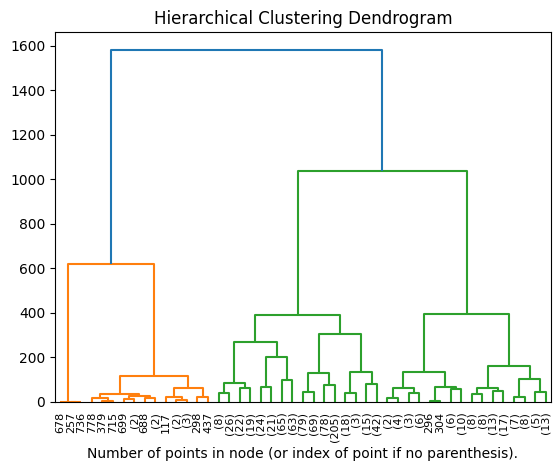

In [56]:
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(train)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

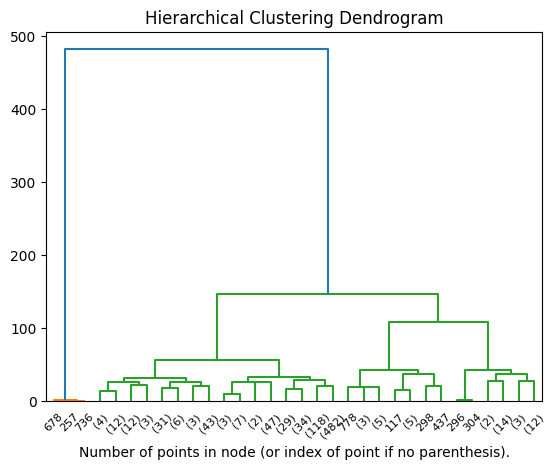

In [57]:
agg_clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average').fit(train)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

2 clusters

In [58]:
agg_clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=2, linkage='ward').fit(train)
agg_labels = agg_clustering.labels_

first_cluster = np.where(agg_labels == 0)
second_cluster = np.where(agg_labels == 1)

First cluster

In [60]:
print(train.iloc[first_cluster])

     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
0           0       3    1  22.0   7.2500         2  0.257788
1           1       1    0  38.0  71.2833         0  0.257788
2           1       3    0  26.0   7.9250         2 -0.639242
3           1       1    0  35.0  53.1000         2  0.257788
4           0       3    1  35.0   8.0500         2 -0.639242
..        ...     ...  ...   ...      ...       ...       ...
886         0       2    1  27.0  13.0000         2 -0.639242
887         1       1    0  19.0  30.0000         2 -0.639242
888         0       3    0  28.0  23.4500         2  1.141729
889         1       1    1  26.0  30.0000         0 -0.639242
890         0       3    1  32.0   7.7500         1 -0.639242

[869 rows x 7 columns]


In [61]:
train.iloc[first_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,0.375144,2.341772,0.654776,29.279827,26.407110,1.552359,-0.011452
std,0.484439,0.819895,0.475715,13.005563,29.272414,0.779096,1.176605
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,-0.639242
25%,0.000000,2.000000,0.000000,22.000000,7.895800,1.000000,-0.639242
50%,0.000000,3.000000,1.000000,28.000000,13.858300,2.000000,-0.639242
75%,1.000000,3.000000,1.000000,35.000000,30.000000,2.000000,0.257788
max,1.000000,3.000000,1.000000,80.000000,164.866700,2.000000,7.420936


Second cluster

In [62]:
print(train.iloc[second_cluster])

     Survived  Pclass  Sex   Age      Fare  Embarked       Kin
27          0       1    1  19.0  263.0000         2  2.935788
88          1       1    0  23.0  263.0000         2  2.935788
118         0       1    1  24.0  247.5208         0 -0.197271
258         1       1    0  35.0  512.3292         0 -0.639242
299         1       1    0  50.0  247.5208         0 -0.197271
311         1       1    0  18.0  262.3750         0  2.038759
341         1       1    0  24.0  263.0000         2  2.935788
377         0       1    1  27.0  211.5000         0  0.244700
380         1       1    0  42.0  227.5250         0 -0.639242
438         0       1    1  64.0  263.0000         2  2.025670
527         0       1    1  28.0  221.7792         2 -0.639242
557         0       1    1  28.0  227.5250         0 -0.639242
679         1       1    1  36.0  512.3292         0 -0.197271
689         1       1    0  15.0  211.3375         2 -0.197271
700         1       1    0  18.0  227.5250         0  0

In [63]:
train.iloc[second_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.700000,1.0,0.400000,30.850000,279.308545,0.800000,0.497600
std,0.470162,0.0,0.502625,12.265806,102.353391,1.005249,1.386062
min,0.000000,1.0,0.000000,15.000000,211.337500,0.000000,-0.639242
25%,0.000000,1.0,0.000000,22.500000,226.088550,0.000000,-0.639242
50%,1.000000,1.0,0.000000,28.000000,247.520800,0.000000,-0.197271
75%,1.000000,1.0,1.000000,36.500000,263.000000,2.000000,2.028943
max,1.000000,1.0,1.000000,64.000000,512.329200,2.000000,2.935788


3 clusters

In [64]:
agg_clustering = AgglomerativeClustering(distance_threshold=None, n_clusters=3, linkage='ward').fit(train)
agg_labels = agg_clustering.labels_
first_cluster = np.where(agg_labels == 0)
second_cluster = np.where(agg_labels == 1)
third_cluster = np.where(agg_labels == 2)

First cluster

In [66]:
print(train.iloc[first_cluster])

     Survived  Pclass  Sex   Age      Fare  Embarked       Kin
27          0       1    1  19.0  263.0000         2  2.935788
88          1       1    0  23.0  263.0000         2  2.935788
118         0       1    1  24.0  247.5208         0 -0.197271
258         1       1    0  35.0  512.3292         0 -0.639242
299         1       1    0  50.0  247.5208         0 -0.197271
311         1       1    0  18.0  262.3750         0  2.038759
341         1       1    0  24.0  263.0000         2  2.935788
377         0       1    1  27.0  211.5000         0  0.244700
380         1       1    0  42.0  227.5250         0 -0.639242
438         0       1    1  64.0  263.0000         2  2.025670
527         0       1    1  28.0  221.7792         2 -0.639242
557         0       1    1  28.0  227.5250         0 -0.639242
679         1       1    1  36.0  512.3292         0 -0.197271
689         1       1    0  15.0  211.3375         2 -0.197271
700         1       1    0  18.0  227.5250         0  0

In [67]:
train.iloc[first_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.700000,1.0,0.400000,30.850000,279.308545,0.800000,0.497600
std,0.470162,0.0,0.502625,12.265806,102.353391,1.005249,1.386062
min,0.000000,1.0,0.000000,15.000000,211.337500,0.000000,-0.639242
25%,0.000000,1.0,0.000000,22.500000,226.088550,0.000000,-0.639242
50%,1.000000,1.0,0.000000,28.000000,247.520800,0.000000,-0.197271
75%,1.000000,1.0,1.000000,36.500000,263.000000,2.000000,2.028943
max,1.000000,1.0,1.000000,64.000000,512.329200,2.000000,2.935788


Second cluster

In [68]:
print(train.iloc[second_cluster])

     Survived  Pclass  Sex   Age      Fare  Embarked       Kin
1           1       1    0  38.0   71.2833         0  0.257788
6           0       1    1  54.0   51.8625         2 -0.639242
31          1       1    0  28.0  146.5208         0  0.257788
34          0       1    1  28.0   82.1708         0  0.257788
35          0       1    1  42.0   52.0000         2  0.257788
..        ...     ...  ...   ...       ...       ...       ...
849         1       1    0  28.0   89.1042         0  0.257788
856         1       1    0  45.0  164.8667         2  0.699759
863         0       3    0  28.0   69.5500         2  7.420936
871         1       1    0  47.0   52.5542         2  0.699759
879         1       1    0  56.0   83.1583         0 -0.197271

[112 rows x 7 columns]


In [69]:
train.iloc[second_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,112.000000,112.000000,112.000000,112.000000,112.00000,112.000000,112.000000
mean,0.651786,1.205357,0.437500,35.660000,90.67061,1.160714,0.638139
std,0.478545,0.555698,0.498308,14.185597,29.76924,0.982308,1.868669
min,0.000000,1.000000,0.000000,0.920000,46.90000,0.000000,-0.639242
25%,0.000000,1.000000,0.000000,25.000000,69.55000,0.000000,-0.197271
50%,1.000000,1.000000,0.000000,35.000000,79.65000,2.000000,0.257788
75%,1.000000,1.000000,1.000000,48.000000,110.88330,2.000000,0.699759
max,1.000000,3.000000,1.000000,70.000000,164.86670,2.000000,7.420936


Third cluster

In [71]:
print(train.iloc[third_cluster])

     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
0           0       3    1  22.0   7.2500         2  0.257788
2           1       3    0  26.0   7.9250         2 -0.639242
3           1       1    0  35.0  53.1000         2  0.257788
4           0       3    1  35.0   8.0500         2 -0.639242
5           0       3    1  28.0   8.4583         1 -0.639242
..        ...     ...  ...   ...      ...       ...       ...
886         0       2    1  27.0  13.0000         2 -0.639242
887         1       1    0  19.0  30.0000         2 -0.639242
888         0       3    0  28.0  23.4500         2  1.141729
889         1       1    1  26.0  30.0000         0 -0.639242
890         0       3    1  32.0   7.7500         1 -0.639242

[757 rows x 7 columns]


In [72]:
train.iloc[third_cluster].describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,Kin
count,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000,757.000000
mean,0.334214,2.509908,0.686922,28.335865,16.899168,1.610304,-0.107561
std,0.472027,0.711931,0.464052,12.559237,12.302779,0.727429,1.002512
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,-0.639242
25%,0.000000,2.000000,0.000000,22.000000,7.895800,2.000000,-0.639242
50%,0.000000,3.000000,1.000000,28.000000,12.350000,2.000000,-0.639242
75%,1.000000,3.000000,1.000000,33.000000,26.000000,2.000000,0.257788
max,1.000000,3.000000,1.000000,80.000000,57.979200,2.000000,4.729847


Mean Shift

In [73]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [74]:
bandwidth = estimate_bandwidth(train, quantile=0.2, n_samples=891)

In [75]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
X = train
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels_unique)
first_cluster = np.where(labels == 0)
print(train.iloc[first_cluster])
print(cluster_centers)

number of estimated clusters : 8
[0 1 2 3 4 5 6 7]
     Survived  Pclass  Sex   Age     Fare  Embarked       Kin
0           0       3    1  22.0   7.2500         2  0.257788
2           1       3    0  26.0   7.9250         2 -0.639242
4           0       3    1  35.0   8.0500         2 -0.639242
5           0       3    1  28.0   8.4583         1 -0.639242
7           0       3    1   2.0  21.0750         2  2.493818
..        ...     ...  ...   ...      ...       ...       ...
886         0       2    1  27.0  13.0000         2 -0.639242
887         1       1    0  19.0  30.0000         2 -0.639242
888         0       3    0  28.0  23.4500         2  1.141729
889         1       1    1  26.0  30.0000         0 -0.639242
890         0       3    1  32.0   7.7500         1 -0.639242

[706 rows x 7 columns]
[[ 3.01145663e-01  2.61865794e+00  7.02127660e-01  2.83698854e+01
   1.30701707e+01  1.60720131e+00 -2.96410220e-01]
 [ 5.84269663e-01  1.44943820e+00  5.28089888e-01  3.16966292e+0

(889,)
[ 0.30114566  2.61865794  0.70212766 28.36988543 13.0701707   1.60720131
 -0.29641022]
(889,)
[ 0.58426966  1.4494382   0.52808989 31.69662921 63.91652584  1.43820225
  0.65259895]
(889,)
[  0.80952381   1.           0.38095238  31.         120.18729048
   0.66666667   0.27509465]
(889,)
[ 8.12500000e-01  1.00000000e+00  1.87500000e-01  3.73125000e+01
  1.45591400e+02  1.25000000e+00 -2.58058576e-02]
(889,)
[  0.63636364   1.           0.36363636  25.72727273 244.83181818
   0.72727273   0.94440298]
(889,)
[  0.66666667   1.           0.33333333  29.77777778 219.71018889
   0.88888889  -0.34314025]
(889,)
[ 1.00000000e+00  1.00000000e+00  6.66666667e-01  3.53333333e+01
  5.12329200e+02  0.00000000e+00 -4.91918045e-01]
(889,)
[  0.5          1.           0.5         57.         255.2604
   1.           0.91419974]


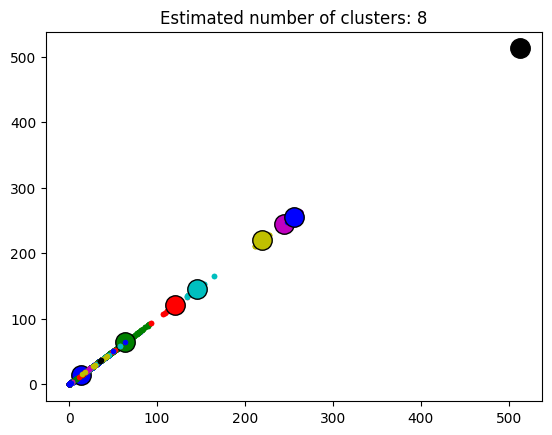

In [76]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    print(my_members.shape)
    cluster_center = cluster_centers[k]
    print(cluster_center)
    plt.plot(X[my_members], X[my_members], col + '.')
    plt.plot(cluster_center[4], cluster_center[4], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()